Processing 001...
Processing 002...
Processing 003...
Processing 004...
Processing 005...


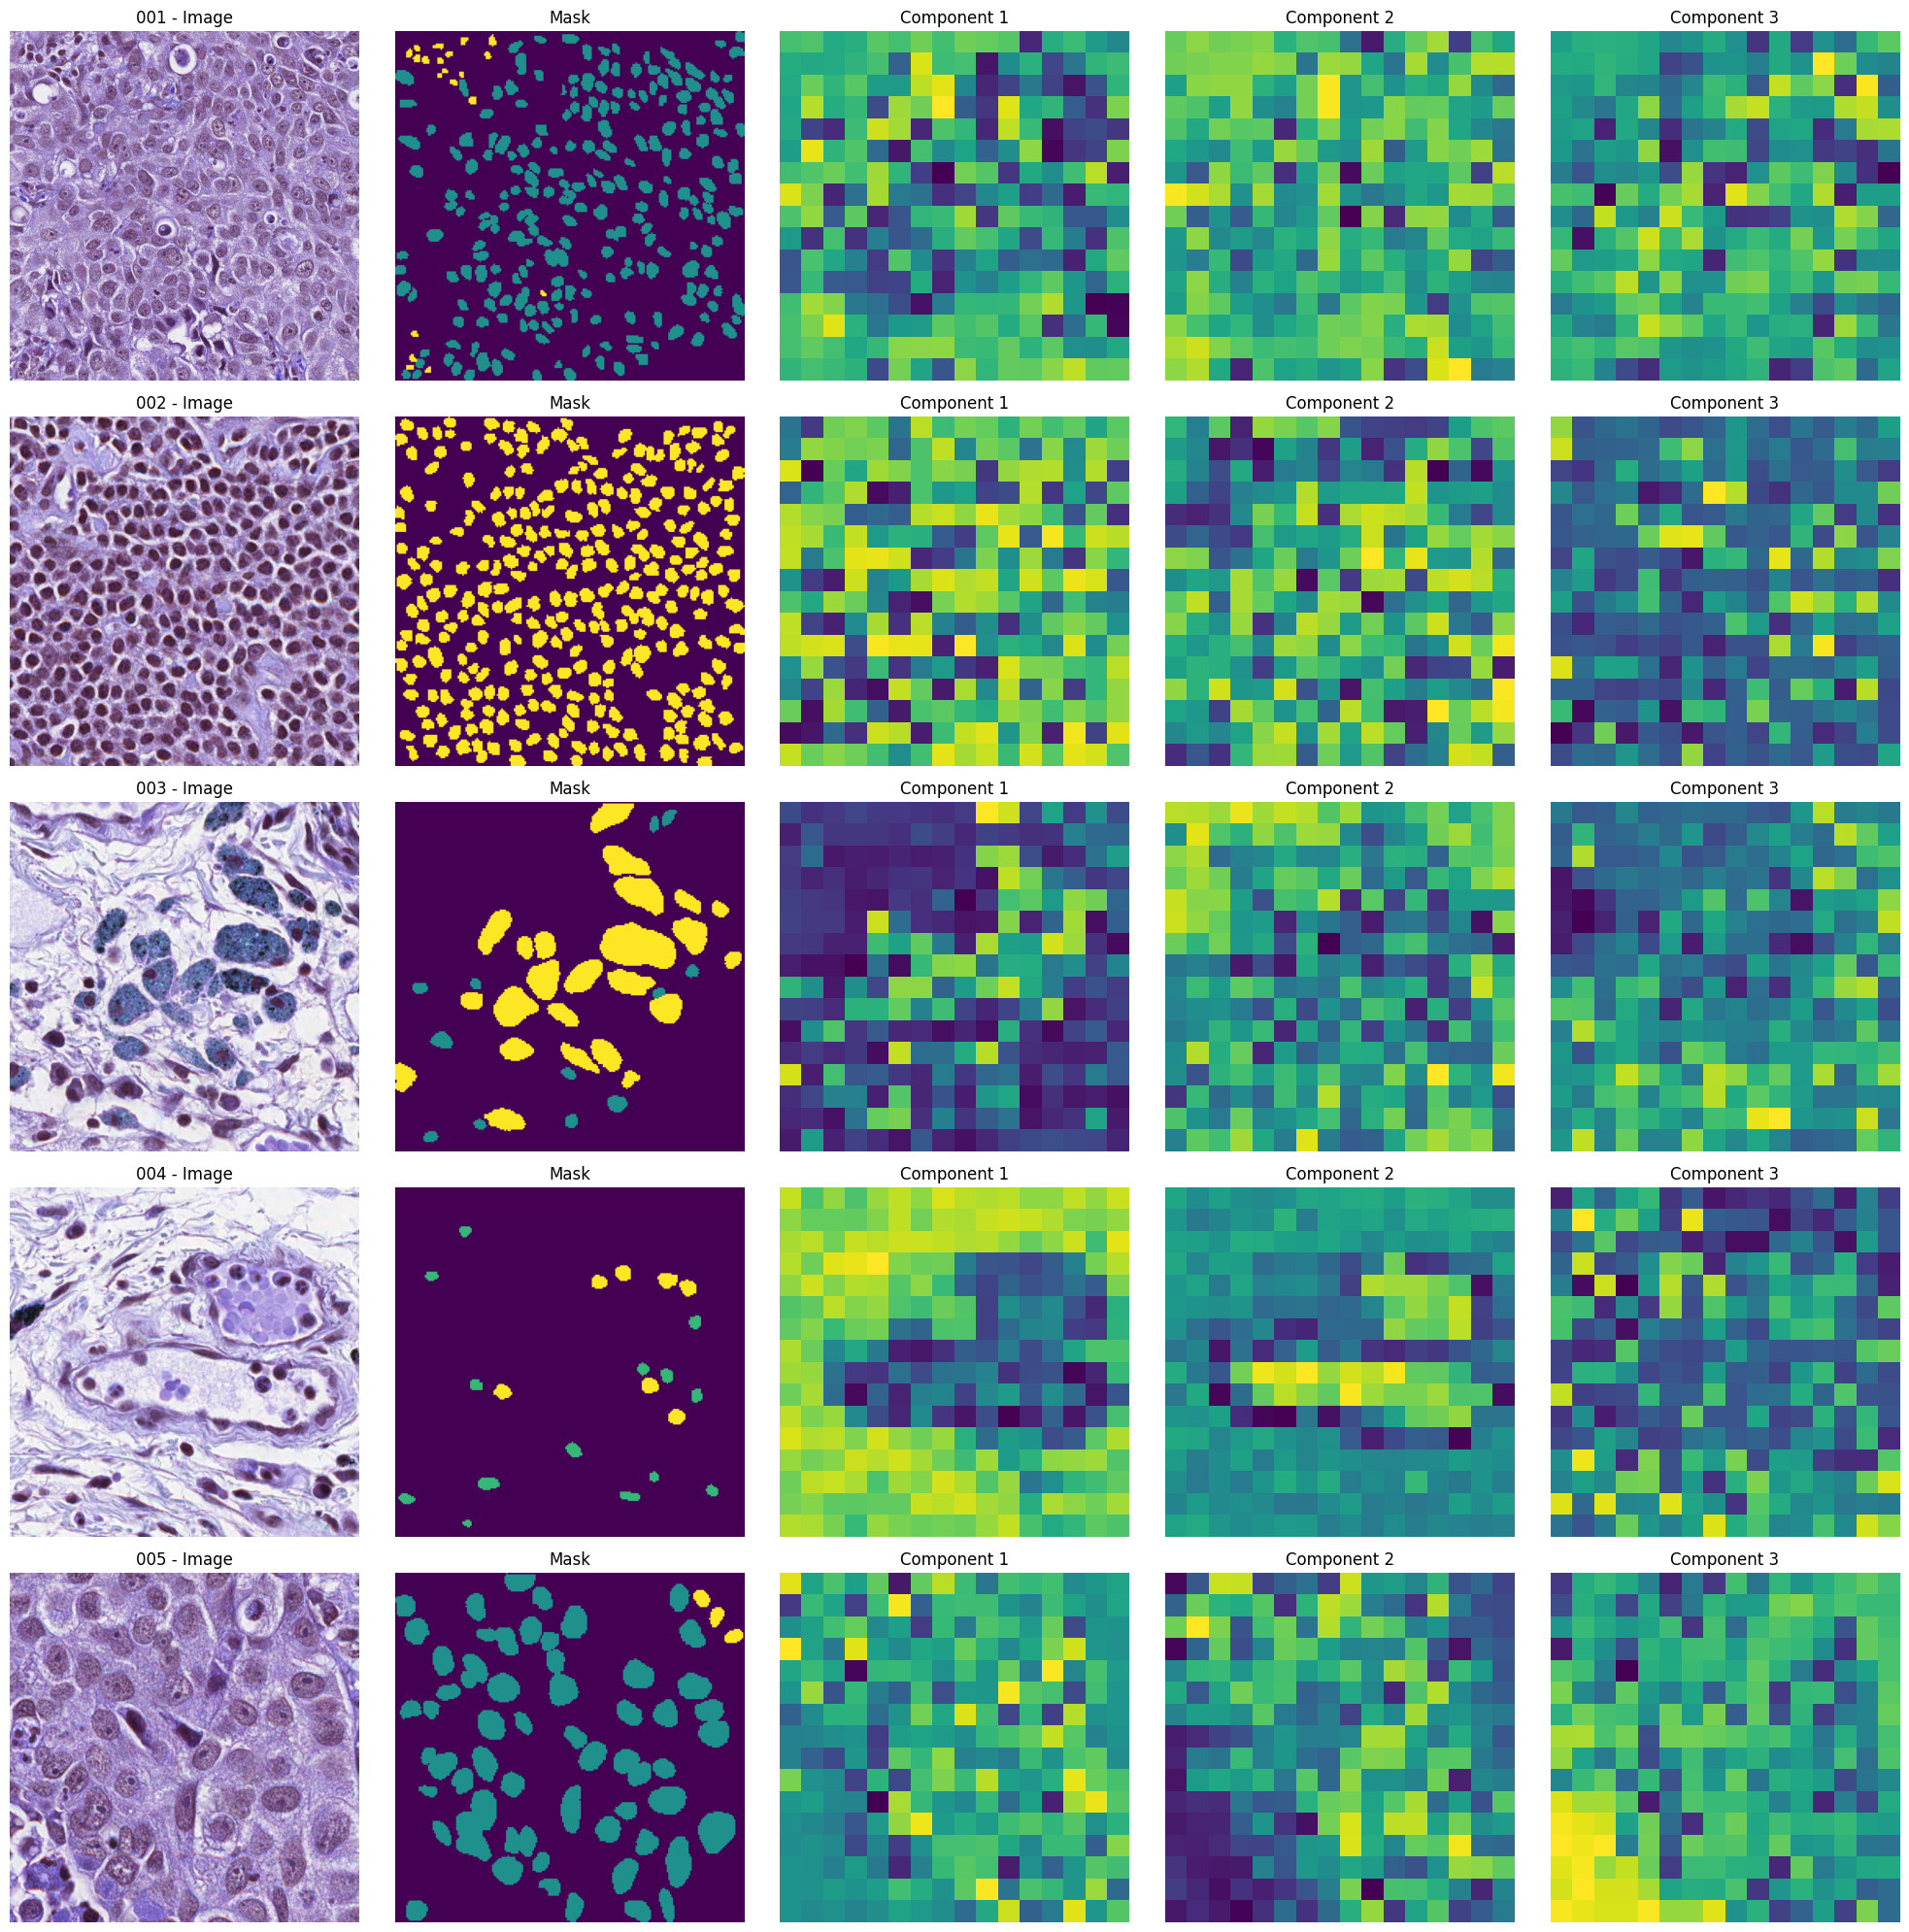

In [1]:
import os
import torch
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

base_path = "/teamspace/gcs_folders/share/viz_emb/monusac/TCGA-55-1594-01Z-00-DX1"
tiles = ["001", "002", "003", "004", "005"]

pca_tiles = []

for t in tiles:
    print(f"Processing {t}...")
    emb = torch.load(f"{base_path}/TCGA-55-1594-01Z-00-DX1_{t}-0.pt")
    C, H, W = emb.shape
    # Reshape and scale
    emb = emb.permute(1, 2, 0).reshape(-1, C).numpy()
    emb_scaled = StandardScaler().fit_transform(emb)

    # PCA
    pca = PCA(n_components=3, random_state=42, whiten=True)
    X_pca = pca.fit_transform(emb_scaled)
    pca_tile = X_pca.reshape(H, W, 3)
    pca_tile = (pca_tile - pca_tile.min(axis=(0, 1))) / (pca_tile.max(axis=(0, 1)) - pca_tile.min(axis=(0, 1)) + 1e-8)
    pca_tiles.append(pca_tile)

# Visualization
fig, axes = plt.subplots(len(tiles), 5, figsize=(20, 4 * len(tiles)))

for i, t in enumerate(tiles):
    img_path = os.path.join(base_path, f"TCGA-55-1594-01Z-00-DX1_{t}.tif")
    mask_path = os.path.join(base_path, f"TCGA-55-1594-01Z-00-DX1_{t}-0-mask.pt")

    img = np.array(Image.open(img_path))
    mask = torch.load(mask_path).squeeze().cpu().numpy()
    pca_img = pca_tiles[i]

    row_axes = axes[i] if len(tiles) > 1 else axes

    # Image
    row_axes[0].imshow(img)
    row_axes[0].set_title(f"{t} - Image")

    # Mask
    row_axes[1].imshow(mask)
    row_axes[1].set_title("Mask")
    
    # PCA Components
    for j in range(3):
        row_axes[j + 2].imshow(pca_img[..., j], cmap="viridis")
        row_axes[j + 2].set_title(f"Component {j + 1}")

    for a in row_axes:
        a.axis("off")

plt.tight_layout()
plt.show()

The End